<a href="https://colab.research.google.com/github/ryangprince/TensorFlow-Bootcamp/blob/main/01_neural_network_regression_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case we're going to simplify it: predicting a numerical value based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.1


## Creating data to view and fit

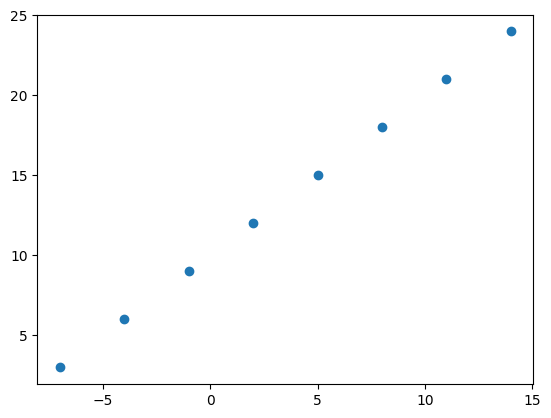

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
X[1], y[1]

(-4.0, 6.0)

In [ ]:
# Input shape
input_shape = X[0].shape

# Output shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors with dtype float32
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

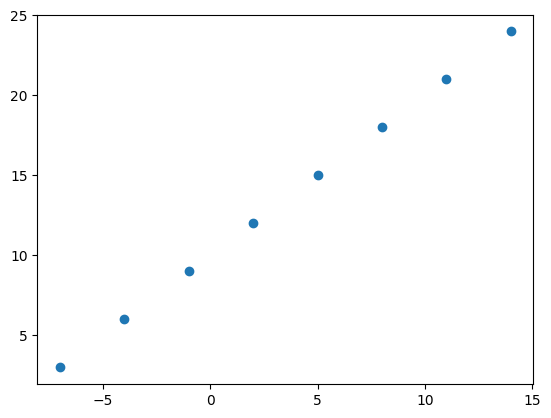

In [ ]:
plt.scatter(X, y)

## Steps in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells the model how wrong it is), the optimizer (tells our model how to improve the patterns its learning), and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try try to find patters between X and y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1, )) # newer versions of TensorFlow require the "input_shape" to be give
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step - loss: 21.3805 - mae: 21.3805
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 20.9874 - mae: 20.9874
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 20.5959 - mae: 20.5959
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 20.3146 - mae: 20.3146
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 20.0334 - mae: 20.0334


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict(np.array([17.0]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[-22.719927]], dtype=float32)

In [ ]:
y_pred + 14.6884

array([[-8.031527]], dtype=float32)

## Improving our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation functions of each layer.
2. **Compiling the model** - here we might change the optimization function, or perhaps the learning **learning rate** of the optimization function.
3. **Fitting the model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1, )), # newer versions of TensorFlow require the "input_shape" to be give
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 526ms/step - loss: 14.1205 - mae: 14.1205
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 13.5928 - mae: 13.5928
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 13.0767 - mae: 13.0767
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.5734 - mae: 12.5734
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 12.0644 - mae: 12.0644
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 11.5421 - mae: 11.5421
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.0066 - mae: 11.0066
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 10.4557 - mae: 10.4557
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.8770 - mae: 9.8770
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.2685 - mae: 9.2685
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 8.6252 - mae: 8.6252
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 7.9393 - mae: 7.9393
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


array([[31.540016]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None, input_shape=(1, )),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss='mae',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])

# 3. Fit the model
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.5099 - mae: 12.5099
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 11.8314 - mae: 11.8314
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 11.1514 - mae: 11.1514
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 10.4689 - mae: 10.4689
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.7816 - mae: 9.7816
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - loss: 9.0863 - mae: 9.0863
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 8.3795 - mae: 8.3795
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 7.6574 - mae: 7.6574
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 6.9159 - mae: 6.9159
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 6.8606 - mae: 6.8606
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 7.1790 - mae: 7.1790
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.3814 - mae: 7.3814
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

It looks like the model is overfitting the data, and is unable to generalize. The mae at the 100th epoch was giving us a mean absolute error of 3.6874, but what we're really looking at is the accuracy of our predictions.

We saw a big improvement when we adjusted the learning rate. The **learning rate** is perhaps the most important hyperparameter of many different neural networks.

A **hyperparameter** is like a dial on your neural network you can adjust to see how it improves, versus a **parameter** which is usually the patterns a neural network learns (the things we don't code ourselves).

In [ ]:
# Let's remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict(np.array([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


array([[28.208046]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```



When it comes to evaluations... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data  - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

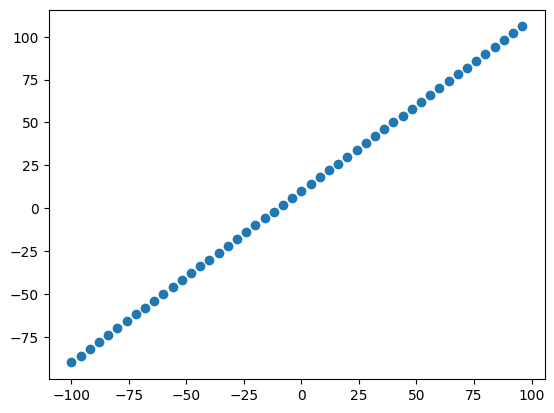

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** (cross validation set) - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model get evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

What we're aiming for is **generalization**, the ability for a machine learning model to perform well on data it hasn't seen before.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in trianing and test sets... let's visualize it again

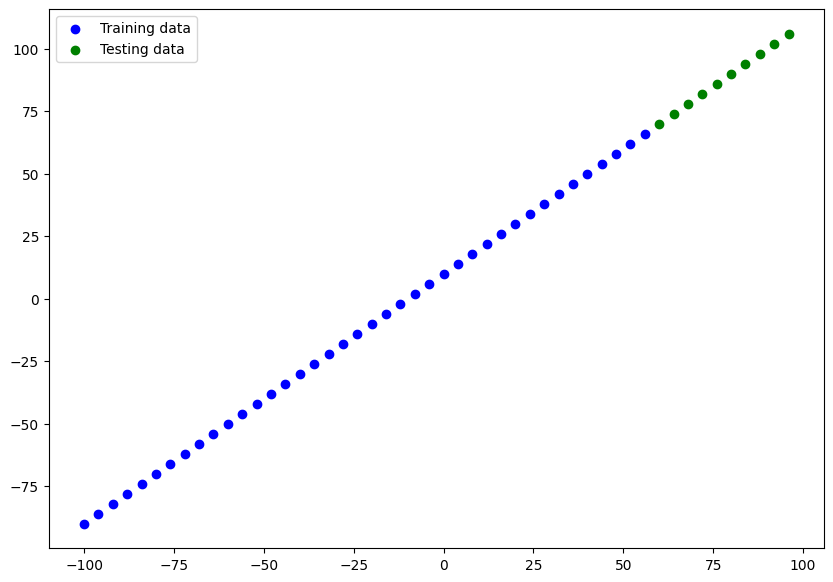

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data') # our model will learn on this
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data') # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend(); # put the semicolon at the end so we don't get the matplotlib output

In [ ]:
# Let's have a look at how to build a neural network for our data

# In the video they got an error they're resolving using the "input_shape" parameter. I already am doing this due to another error so keeping this model.
# In this case, we're giving "input_shape=[1]" instead of before when we gave it "input_shape=(1, )"
# The different "input_shape" values appear to have the same impact/ result.

# Setting the seed as they do in the video
tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['mae'])

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model. The total number of patters our network is going to learn (in this case 2).
* Trainable parameters - these are the parameters (patterns) the model can update as it trains (in this case, Total params and Trainable params are equal).
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patters or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.
> [MIT Introduction to Deep Learning | 6.S191](https://youtu.be/ErnWZxJovaM?si=SEDL0expOWAz6Dd3)

🛠 **Exercise:** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

We see it says the layer is "Dense". Another name for a dense layer is a fully connected layer, which simply mean that all of the neurons in a layer are connected to all the neurals in the next layer.

It appears that the number after "dense_" just shows which instance in the notebook I have called a model. In this case, so when I first ran the model above I got "dense_34", then I ran again and got "dense_35", and then again and got "dense_36".

In [ ]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=500, verbose=0)

Changing the epochs to 500 yeilded the most significant improvement. Changing the optimizer to Adam helped a bit, and adding additional layers resulted in overfitting, but increasing the epochs was very effective.

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95 (384.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 64 (260.00 B)

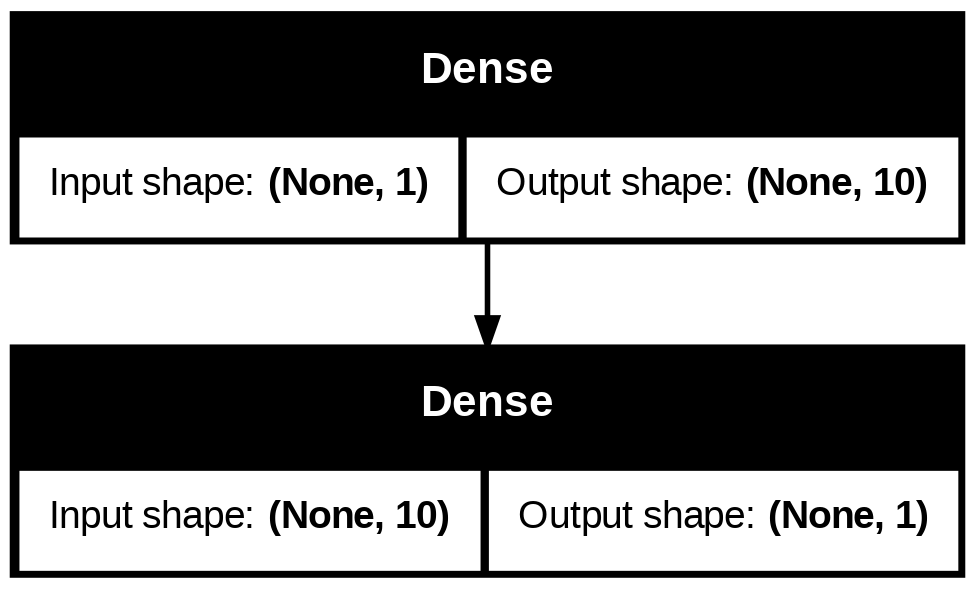

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in for the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


array([[ 68.20902 ],
       [ 72.15372 ],
       [ 76.09841 ],
       [ 80.043106],
       [ 83.98779 ],
       [ 87.932495],
       [ 91.87718 ],
       [ 95.82188 ],
       [ 99.76657 ],
       [103.71126 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

NameError: name 'y_pred' is not defined

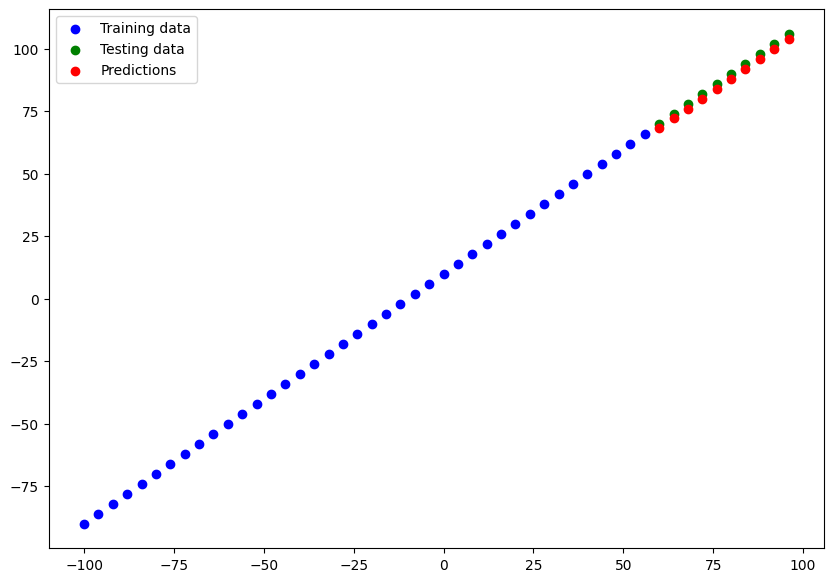

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
 * MAE measures the average magnitude of errors in a set of predictions, without considering their direction5. It is calculated by taking the average of the absolute differences between predicted and actual values.
 * Use MAE when you want to treat all errors equally.
* MSE - mean square error, "square the average errors"
 * MSE is the average of the squared differences between the predicted and actual values.
 * Use MSE when you want to penalize large errors more heavily.


In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 2.0399 - mae: 2.0399


[2.0398566722869873, 2.0398566722869873]

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_test, y_pred=tf.constant(y_pred)) # or use: tf.keras.losses.MAE(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.7909775, 1.846283 , 1.9015884, 1.9568939, 2.012207 , 2.067505 ,
       2.122818 , 2.1781235, 2.233429 , 2.288742 ], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 68.20902 ],
       [ 72.15372 ],
       [ 76.09841 ],
       [ 80.043106],
       [ 83.98779 ],
       [ 87.932495],
       [ 91.87718 ],
       [ 95.82188 ],
       [ 99.76657 ],
       [103.71126 ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 68.20902 ,  72.15372 ,  76.09841 ,  80.043106,  83.98779 ,
        87.932495,  91.87718 ,  95.82188 ,  99.76657 , 103.71126 ],
      dtype=float32)>

The `tf.metrics.mean_absolute_error()` and `tf.metrics.mean_square_error()` functions are deprecated.

In [ ]:
# Calculate the mean absolute error
mae = tf.keras.metrics.mae(y_true=y_test,
                           y_pred=tf.squeeze(y_pred))

mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.0398567>

In [ ]:
# Calulate the mean squared error using tf.keras.metrics.MeanSquaredError()
mse = tf.keras.metrics.MeanSquaredError()
mse.update_state(y_true=y_test,
    y_pred=y_pred)
mse = mse.result()
mse

<tf.Tensor: shape=(), dtype=float32, numpy=4.186251>

In [ ]:
# Calulate the mean squared error using tf.keras.metrics.MeanSquaredError() without the update_state() method or the result() method
mse = tf.keras.metrics.MeanSquaredError()
mse(y_true=y_test,
    y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.186251>

In [ ]:
# Calulate the mean squared error using tf.keras.losses.MeanSquaredError()
mse = tf.keras.losses.MeanSquaredError()
mse(y_true=y_test,
    y_pred=y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4.186251>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.keras.metrics.mae(y_true=y_true,
                           y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  mse = tf.keras.losses.MeanSquaredError()
  return mse(y_true=y_true,
             y_pred=y_pred)


### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidding units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiements:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.
 * in each of these models we're going to have an an extra output layer with one unit to avoid already seen errors.

 Build three more models and evaluate them on my own:
 4. `model_4` - 2 layers, trained for 100 epochs, use Hubor loss value.
 > The Huber loss function is a combination of the squared-error and absolute-error loss functions.
 5. `model_5` - 2 layers, trained for 100 epochs, use Adam optimizer.
 6. `model_6` - 2 layer, trained for 500 epochs, use Adam optimizer.

**Build `model_1`**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(1, name='output_layer')
], name='model_1')

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# 3. Fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 52.8258 - mae: 52.8258 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.8002 - mae: 24.8002 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 23.0968 - mae: 23.0968 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.0630 - mae: 19.0630 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 17.0555 - mae: 17.0555 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.1065 - mae: 16.1065 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16.4034 - mae: 16.4034 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.0224 - mae: 12.0224 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.9432 - mae: 14.9432 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.8710 - mae: 15.8710 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 12.0058 - mae: 12.0058 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15.0241 - mae: 15.0241 
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


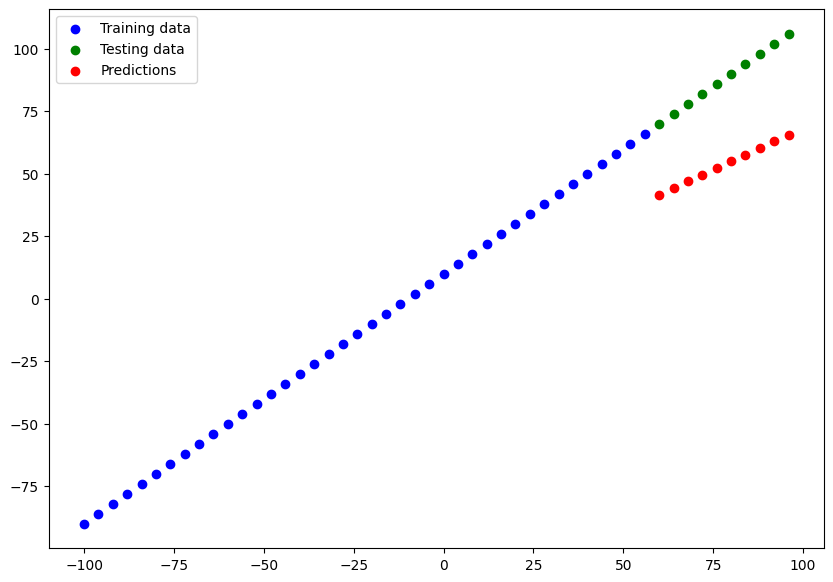

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=34.376625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1196.4414>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [ ]:
# Set the random seed

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7456 - mae: 0.7456  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.7153 - mae: 0.7153 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7372 - mae: 0.7372 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.7091 - mae: 0.7091 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6706 - mae: 0.6706 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6672 - mae: 0.6672
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6132 - mae: 0.6132 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5772 - mae: 0.5772 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5559 - mae: 0.5559
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5722 - mae: 0.5722
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5234 - mae: 0.5234 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4842 - mae: 0.4842 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


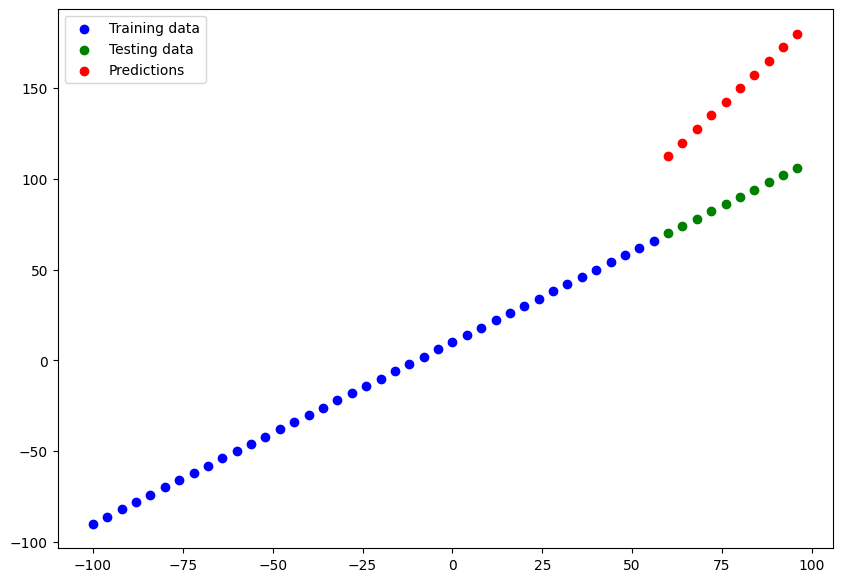

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=58.12434>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3479.1296>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mse'])

# 3. Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 51.1618 - mse: 3601.0925 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.6545 - mse: 1932.9122 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.9497 - mse: 174.6370
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 10.5541 - mse: 168.1620
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.3102 - mse: 164.0578
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1788 - mse: 160.8954
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.1325 - mse: 158.1463
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.1517 - mse: 155.7049
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.2212 - mse: 153.6534
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.3296 - mse: 152.1405
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.4674 - mse: 151.3193
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 10.6272 - mse: 151.3160
Epoch 13/500
2/2 ━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


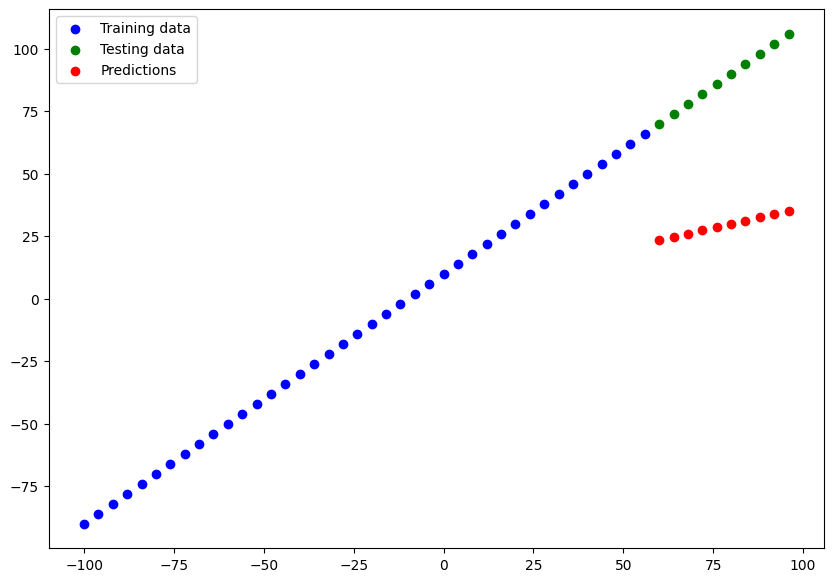

In [ ]:
# Make and plot predictions of model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluations metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=58.663933>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3500.935>)

🔑 **Note:** You want to start with small experiements (small models) and make sure they work and then increase their scale when necessary.

**Build `model_4`**

*Independent exercise*

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.huber,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae', 'mse'])

# 3. Fit the model
model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 23.5840 - mae: 24.0737 - mse: 1722.1699
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 25.7168 - mae: 26.2133 - mse: 934.9677 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 32.3972 - mae: 32.8823 - mse: 1483.7516 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.0409 - mae: 14.5349 - mse: 292.0620 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.1082 - mae: 12.6074 - mse: 197.0921 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.7726 - mae: 12.2718 - mse: 185.3418 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.5123 - mae: 12.0115 - mse: 177.1418 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 11.3199 - mae: 11.8191 - mse: 171.5481
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1810 - mae: 11.6802 - mse: 167.7226
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.0826 - mae: 11.5818 - mse: 165.0880
Epoch 11/100
2/2 ━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


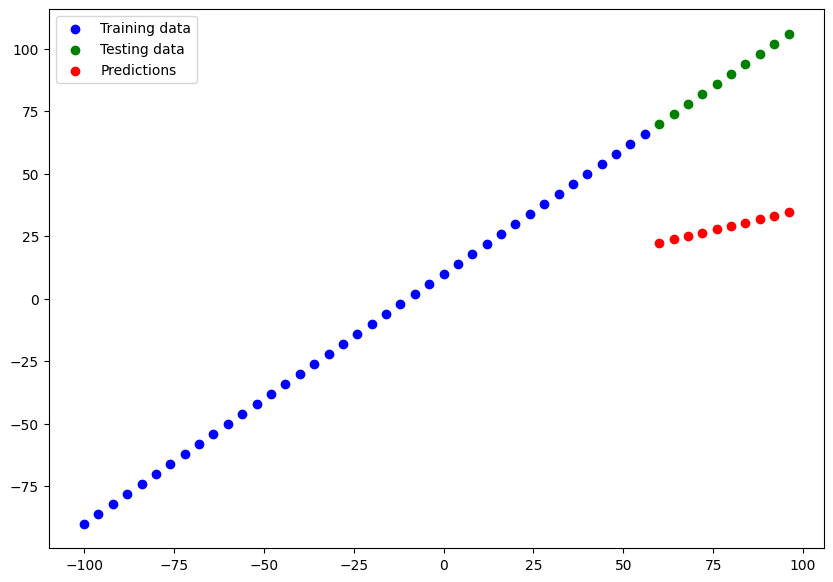

In [ ]:
# Make and plot predictions of model_4
y_preds_4 = model_4.predict(X_test)
plot_predictions(predictions=y_preds_4)

In [ ]:
# Calculate model_4 evaluation metrics
mae_4 = mae(y_test, y_preds_4)
mse_4 = mse(y_test, y_preds_4)
mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=59.543934>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3603.267>)

**Build `model_5`**

* 2 layers, trained for 100 epochs, use Adam optimizer.

*Independent exercise*

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_5.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 69.3813 - mae: 69.3813
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 67.5486 - mae: 67.5486 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.7266 - mae: 65.7266 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 63.9123 - mae: 63.9123 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 62.1049 - mae: 62.1049 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 60.3027 - mae: 60.3027
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 58.5042 - mae: 58.5042 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 56.7084 - mae: 56.7084 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 54.9143 - mae: 54.9143
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 53.1204 - mae: 53.1204
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 51.3370 - mae: 51.3370  
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.5592 - mae: 49.5592 
Epoch 13/100
2/2 ━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


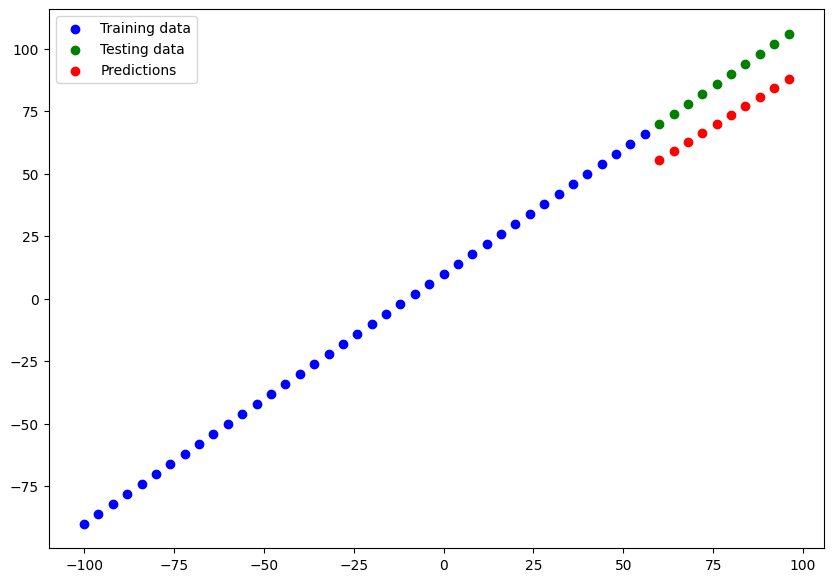

In [ ]:
# Make and plot predictions of model_5
y_preds_5 = model_5.predict(X_test)
plot_predictions(predictions=y_preds_5)

In [ ]:
# Calculate model_5 evaluation metrics
mae_5 = mae(y_test, y_preds_5)
mse_5 = mse(y_test, y_preds_5)
mae_5, mse_5

(<tf.Tensor: shape=(), dtype=float32, numpy=16.398703>,
 <tf.Tensor: shape=(), dtype=float32, numpy=270.25967>)

**Build `model_6`**

* 2 layer, trained for 500 epochs, use Adam optimizer.

*Independent exercise*

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='input_layer'),
    tf.keras.layers.Dense(10, name='hidden_layer_1'),
    tf.keras.layers.Dense(1, name='output_layer')
])

# 2. Compile the model
model_6.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])

# 3. Fit the model
model_6.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 25.2897 - mae: 25.2897
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.5355 - mae: 23.5355 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 21.7884 - mae: 21.7884 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20.0584 - mae: 20.0584 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.3502 - mae: 18.3502 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.6533 - mae: 16.6533 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.0151 - mae: 15.0151 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.4164 - mae: 13.4164 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8822 - mae: 11.8822 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 10.4398 - mae: 10.4398 
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.1632 - mae: 9.1632 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1781 - mae: 8.1781 
Epoch 13/500
2/2 ━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


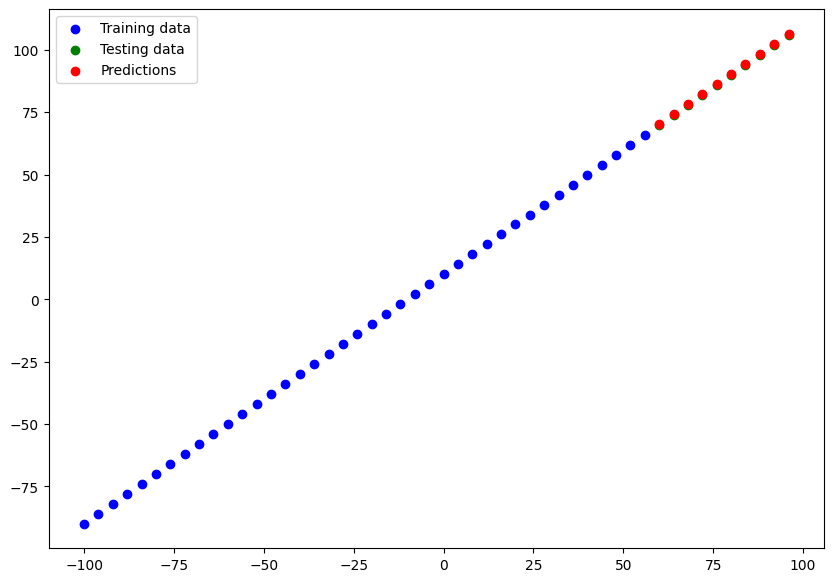

In [ ]:
# Make and plot predictions of model_6
y_preds_6 = model_6.predict(X_test)
plot_predictions(predictions=y_preds_6)

In [ ]:
# Calculate model_6 evaluations metrics
mae_6 = mae(y_test, y_preds_6)
mse_6 = mse(y_test, y_preds_6)
mae_6, mse_6

(<tf.Tensor: shape=(), dtype=float32, numpy=0.37885588>,
 <tf.Tensor: shape=(), dtype=float32, numpy=0.1466609>)

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [['model_1', mae_1.numpy(), mse_2.numpy()],
                 ['model_2', mae_2.numpy(), mse_2.numpy()],
                 ['model_3', mae_3.numpy(), mse_3.numpy()],
                 ['model_4', mae_4.numpy(), mse_4.numpy()],
                 ['model_5', mae_5.numpy(), mse_5.numpy()],
                 ['model_6', mae_6.numpy(), mse_6.numpy()]]

all_results = pd.DataFrame(model_results, columns=['model', 'mae', 'mse'])
all_results

,model,mae,mse
0,model_1,34.376625,3479.129639
1,model_2,58.124340,3479.129639
2,model_3,58.663933,3500.935059
3,model_4,59.543934,3603.267090
4,model_5,16.398703,270.259674
5,model_6,0.378856,0.146661


In [ ]:
model_2.summary(), model_5.summary(), model_6.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141 (564.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 425 (1.66 KB)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 284 (1.11 KB)

(None, None, None)

🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiements you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember, the machine learning practitioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modeling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFLow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobil app.

There are two main formats we can save our models to:

1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format
model_2.save('best_model_SavedModel_format') # This functionalionality has been deprecated

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=best_model_SavedModel_format.

There are two main options for saving models in Google Colab:

1. Use the recommended `.keras` extension:
> model_2.save('best_model.keras')
 * This saves the model in the native Keras format, which is now the preferred method.
2. Use the `.h5` extension for the older HDF5 format:
> model_2.save('best_model.h5')
3. If you specifically want to save in the SavedModel format for use with TFLite or TensorFlow Serving, use the `export` method instead:
> model_2.export('best_model_SavedModel_format`)
 * This wil create a Saved Model directory without requiring a specific file extension.

Remember that when loading the model later, use the corresponding method:
* For `.keras` or `.h5` files: `tf.keras.models.load_model('best_model.keras')`
* For SavedModel format: `tf.saved_model.load('best_model_SavedModel_format')`

When working in Google Colab, you can save the model directly to your Google Drive by mounting it first:
```
from google.colab import drive
drive.mount('/content/drive')

model_2.save('/content/drive/MyDrive/best_model.keras')
```

In [ ]:
# Save model using the SavedModel format
model_2.save('best_model_Keras_format.keras')

In [ ]:
# Save model using the HDF5 format
model_2.save('best_model_HDF5_format.h5')

## Loading in a saved model

In [ ]:
# Load in the Keras format model
loaded_Keras_format = tf.keras.models.load_model('/content/best_model_Keras_format.keras')
loaded_Keras_format.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (576.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Compare model_2 predictions with Keras format model predictions
model_2_preds = model_2.predict(X_test)
loaded_Keras_format_preds = loaded_Keras_format.predict(X_test)
model_2_preds == loaded_Keras_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 143 (576.00 B)

 Trainable params: 141 (564.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [ ]:
# Download a file from google colab
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requiers mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_with_daniel_bourke

In [ ]:
# Check that the file is in the new directory
!ls /content/drive/MyDrive/tensorflow_with_daniel_bourke

best_model_HDF5_format.h5


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance, dtype=int)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop('charges', axis=1)
y = insurance_one_hot['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# Create the model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10057.8467 - mae: 10057.8467
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7573.5894 - mae: 7573.5894
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7555.7681 - mae: 7555.7681
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7981.8667 - mae: 7981.8667
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7637.2920 - mae: 7637.2920
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7673.7510 - mae: 7673.7510
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7458.5825 - mae: 7458.5825
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7833.5854 - mae: 7833.5854
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7320.0327 - mae: 7320.0327
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7498.4053 - mae: 7498.4053
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7362.6133 - mae: 7362.6133
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8027.0903 - mae: 8027.0903  


[7992.349609375, 7992.349609375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer.
2. Same as above but train for longer (200 epochs).
3. (insert your own experiment here)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13276.5254 - mae: 13276.5254
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13150.8281 - mae: 13150.8281 
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12894.4199 - mae: 12894.4199
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12368.4297 - mae: 12368.4297 
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11422.8096 - mae: 11422.8096
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10055.9912 - mae: 10055.9912 
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8602.2402 - mae: 8602.2402 
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7635.4951 - mae: 7635.4951 
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7415.4697 - mae: 7415.4697 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7378.9717 - mae: 7378.9717 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7358.2598 - mae: 7358.2598
Epoch 12/100
34/34 ━━━━━━━━━━━━━━

In [ ]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5174.4248 - mae: 5174.4248  


[5017.1630859375, 5017.1630859375]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8027.0903 - mae: 8027.0903 


[7992.349609375, 7992.349609375]

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13269.7139 - mae: 13269.7139
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13074.6104 - mae: 13074.6104
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12690.2832 - mae: 12690.2832 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11944.8145 - mae: 11944.8145 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10715.7148 - mae: 10715.7148 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9201.9365 - mae: 9201.9365
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7909.8359 - mae: 7909.8359 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7408.8765 - mae: 7408.8765
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7346.3975 - mae: 7346.3975
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7323.1660 - mae: 7323.1660 
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7301.2002 - mae: 7301.2002 
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3455.9187 - mae: 3455.9187  


[3391.48046875, 3391.48046875]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8027.0903 - mae: 8027.0903 


[7992.349609375, 7992.349609375]

Text(0.5, 0, 'epochs')

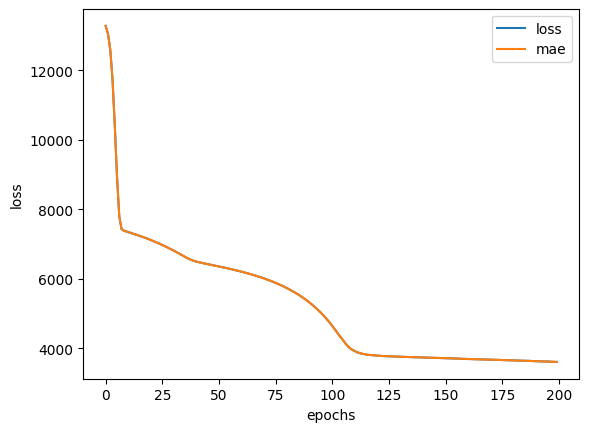

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

> 🤨 ** Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

> [Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance data
insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

You'll notice that below we fit our training data `ct.fit(X_train)` but not our test data. Here's the reason:
>When you call `StandardScaler.fit(X_train)`, what it does is calculate the mean and variance from the values in `X_train`. Then calling `.transform()` will transform all of the features by subtracting the mean and dividing by the variance. For convenience, these two function calls can be done in one step using `fit_transform()`.

> The reason you want to fit the scaler using only the training data is because you don't want to bias your model with information from the test data.

> If you `fit()` to your test data, you'd compute a **new** mean and variance for each feature. In theory these values may be very similar if your test and train sets have the same distribution, but in practice this is typically not the case.

> Instead, you want to only transform the test data by using the parameters computed on the training data. [Link to StackOverlow thread](https://stackoverflow.com/questions/48692500/fit-transform-on-training-data-and-transform-on-test-data)

#### Transform data with MinMaxScaler

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region']) # When an unknown category is encountered the one-hot encoded columns will be all zeros
)

# Create X & y
X = insurance.drop('charges', axis=1)
y = insurance['charges']

# Build and train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
# Remember, you need to transform your test data as well because the model is training on transformed values
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data look like now
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful! Our data has been normalized and one hot encoded.
Now let's build a neural network model on it and see how it goes.

In [ ]:
# Build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# 3. Fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13296.5723 - mae: 13296.5723
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13287.6084 - mae: 13287.6084 
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13265.8096 - mae: 13265.8096 
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13220.0459 - mae: 13220.0459 
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13139.0625 - mae: 13139.0625 
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13012.0029 - mae: 13012.0029 
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12828.7227 - mae: 12828.7227 
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12579.4219 - mae: 12579.4219 
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12254.5381 - mae: 12254.5381 
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11849.1787 - mae: 11849.1787
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11374.4326 - mae: 11374.4326 
Epoch 12/200
34/34 ━━

In [ ]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3214.2500 - mae: 3214.2500  


[3161.018310546875, 3161.018310546875]

In [ ]:
# 9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5174.4248 - mae: 5174.4248
# [5017.1630859375, 5017.1630859375]

### 🛠 01. Neural Network Regression in TensorFlow Exercises

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
* Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow `tf.keras.datasets` and model it.

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the Boston pricing dataset

# Load the dataset
(train_data, train_targets), (test_data, test_targets) = tf.keras.datasets.boston_housing.load_data()

# Create DataFrames for training and test data
X_train = pd.DataFrame(train_data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Extra'  # Added an extra column name
])
# y_train['PRICE'] = train_targets
y_train = pd.DataFrame(train_targets, columns=['PRICE'])


X_test = pd.DataFrame(test_data, columns=[
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Extra'  # Added an extra column name
])
# y_test['PRICE'] = test_targets
y_test = pd.DataFrame(test_targets, columns=['PRICE'])

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 13), (404, 1), (102, 13), (102, 1))

#### Visualize the data

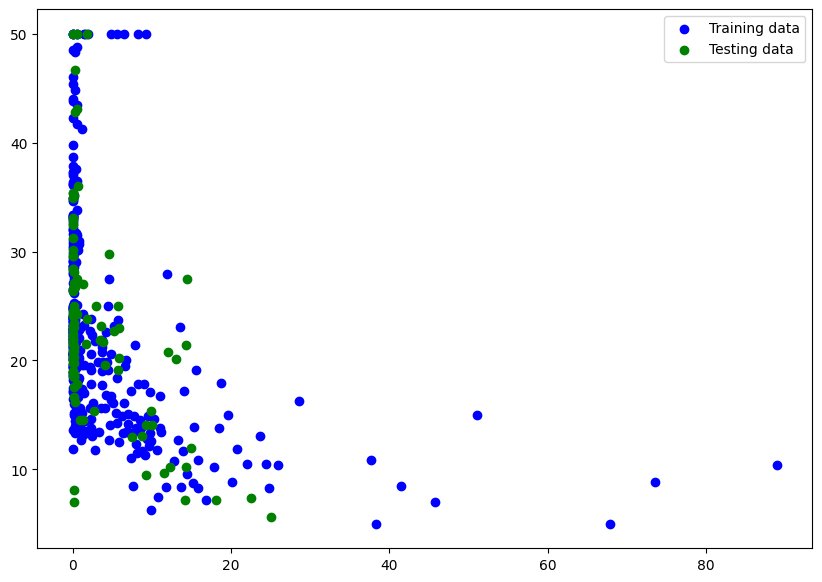

In [ ]:
# Visualize the data

plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train['CRIM'], y_train, c='b', label='Training data') # our model will learn on this
# Plot test data in green
plt.scatter(X_test['CRIM'], y_test, c='g', label='Testing data') # want our model to be able to predict this (given X, what's y?)
# Show a legend
plt.legend(); # put the semicolon at the end so we don't get the matplotlib output

In [ ]:
X_train.loc[0]

,0
CRIM,1.23247
ZN,0.00000
INDUS,8.14000
CHAS,0.00000
NOX,0.53800
RM,6.14200
DIS,91.70000
RAD,3.97690
TAX,4.00000
PTRATIO,307.00000


#### Process the data using `MinMaxScaler`

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler

# Create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'Extra'])
)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform the data the value of all elements are between 0 and 1
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.01378163, 0.        , 0.28152493, 0.        , 0.31481481,
       0.49980635, 0.91452111, 0.29719123, 0.13043478, 0.22753346,
       0.89361702, 1.        , 0.46881898])

#### Build a model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mae'])

# 3. Fit the model
history = boston_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 22.2357 - mae: 22.2357
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.0253 - mae: 20.0253 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 17.2664 - mae: 17.2664
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13.7658 - mae: 13.7658 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 10.7129 - mae: 10.7129 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.0129 - mae: 9.0129 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3321 - mae: 8.3321 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.6972 - mae: 7.6972 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.0658 - mae: 7.0658 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5172 - mae: 6.5172 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.0409 - mae: 6.0409
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.6194 - mae: 5.6194 
Epoch 13/100
13/1

#### Make some predictions

In [ ]:
y_pred = boston_model.predict(X_test_normal)
y_pred

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


array([[ 9.5460205],
       [19.035313 ],
       [21.0151   ],
       [27.245913 ],
       [23.702616 ],
       [20.444792 ],
       [28.608414 ],
       [23.484743 ],
       [19.668674 ],
       [20.741756 ],
       [17.663715 ],
       [17.61395  ],
       [17.130749 ],
       [35.53136  ],
       [14.514189 ],
       [20.340244 ],
       [24.92665  ],
       [21.297815 ],
       [17.806606 ],
       [20.227762 ],
       [ 9.307326 ],
       [12.500663 ],
       [20.52421  ],
       [13.966388 ],
       [21.743029 ],
       [20.609898 ],
       [29.303385 ],
       [26.49557  ],
       [12.29498  ],
       [20.529148 ],
       [21.898159 ],
       [16.727388 ],
       [32.27476  ],
       [23.654766 ],
       [16.05027  ],
       [ 5.353512 ],
       [15.893724 ],
       [19.90992  ],
       [15.839815 ],
       [27.525883 ],
       [25.271576 ],
       [26.600811 ],
       [16.757036 ],
       [35.26868  ],
       [27.572237 ],
       [23.224773 ],
       [28.521826 ],
       [18.06

#### Visualize the models predictions versus the target data

In [ ]:
# Let's create a plotting function
def plot_preds(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  # plt.scatter(train_data, train_labels, c='b', label='Training data')
  # Plot testing data in green
  plt.scatter(test_data,test_labels, c='g', label='Testing data')
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label='Predictions')
  # Show the legend
  plt.legend();

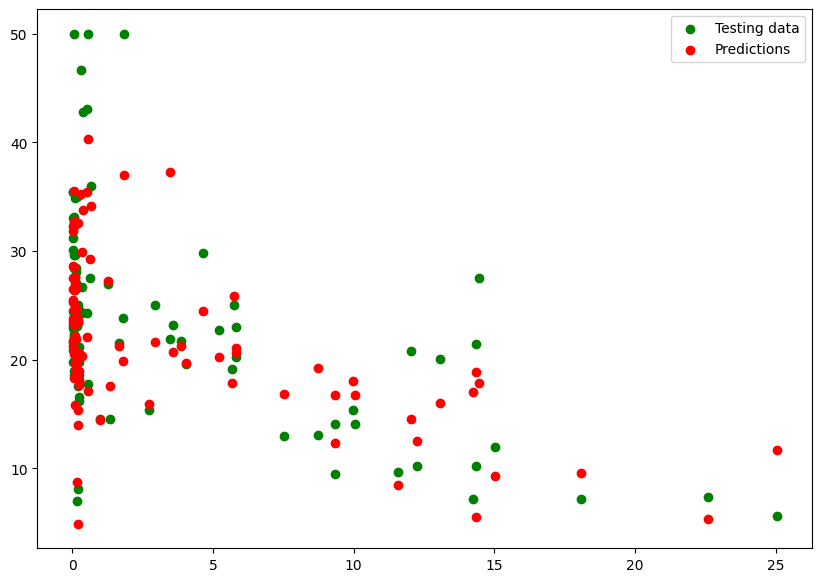

In [ ]:
plot_preds(test_data=X_test['CRIM'], test_labels=y_test, predictions=y_pred)

#### Evaluate the model

In [ ]:
boston_model.evaluate(X_test_normal, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 2.8869 - mae: 2.8869 


[3.0738275051116943, 3.0738275051116943]

Text(0.5, 0, 'epochs')

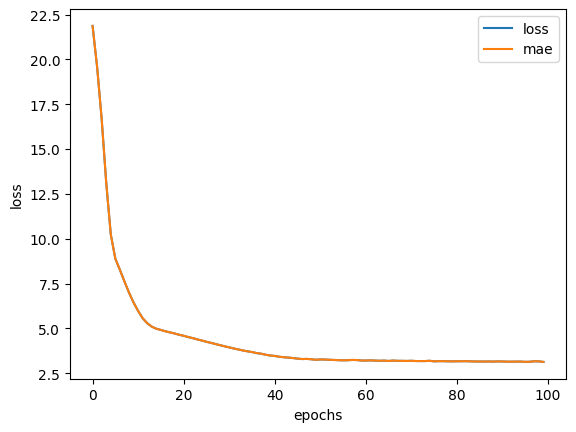

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#### Try adding an additional layer

This did not work an ended up reducing the mean absolute error.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
boston_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_model_2.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['mae'])

# 3. Fit the model
history_2 = boston_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 20.9352 - mae: 20.9352
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 14.7074 - mae: 14.7074
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.7423 - mae: 8.7423
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7.6136 - mae: 7.6136
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6.3520 - mae: 6.3520
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.4583 - mae: 5.4583
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0851 - mae: 5.0851
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.8666 - mae: 4.8666
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.6841 - mae: 4.6841
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4.5300 - mae: 4.5300
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.3789 - mae: 4.3789
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2306 - mae: 4.2306
Epoch 13/100
13/13 ━━━━━

In [ ]:
y_pred_2 = boston_model_2.predict(X_test_normal)
y_pred_2

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


array([[ 9.650309 ],
       [18.68949  ],
       [20.62839  ],
       [25.917677 ],
       [23.498407 ],
       [20.361305 ],
       [28.396917 ],
       [23.231907 ],
       [19.066166 ],
       [20.797142 ],
       [17.25777  ],
       [16.901478 ],
       [16.698515 ],
       [35.766838 ],
       [14.145675 ],
       [19.891895 ],
       [25.06383  ],
       [21.051544 ],
       [17.623434 ],
       [19.09085  ],
       [ 9.164113 ],
       [12.471878 ],
       [20.238773 ],
       [13.407289 ],
       [21.237835 ],
       [20.602083 ],
       [28.820866 ],
       [25.54283  ],
       [12.227816 ],
       [20.308844 ],
       [21.6082   ],
       [16.916855 ],
       [31.90235  ],
       [23.764103 ],
       [16.028883 ],
       [ 5.30927  ],
       [14.620237 ],
       [19.071556 ],
       [15.242182 ],
       [27.133305 ],
       [24.728207 ],
       [26.526073 ],
       [16.368551 ],
       [35.746147 ],
       [27.07757  ],
       [23.06044  ],
       [28.603195 ],
       [17.57

In [ ]:
# Evaluate the model
boston_model_2.evaluate(X_test_normal, y_test)

# boston_model evaluations [3.0738275051116943, 3.0738275051116943]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.9737 - mae: 2.9737 


[3.161533832550049, 3.161533832550049]

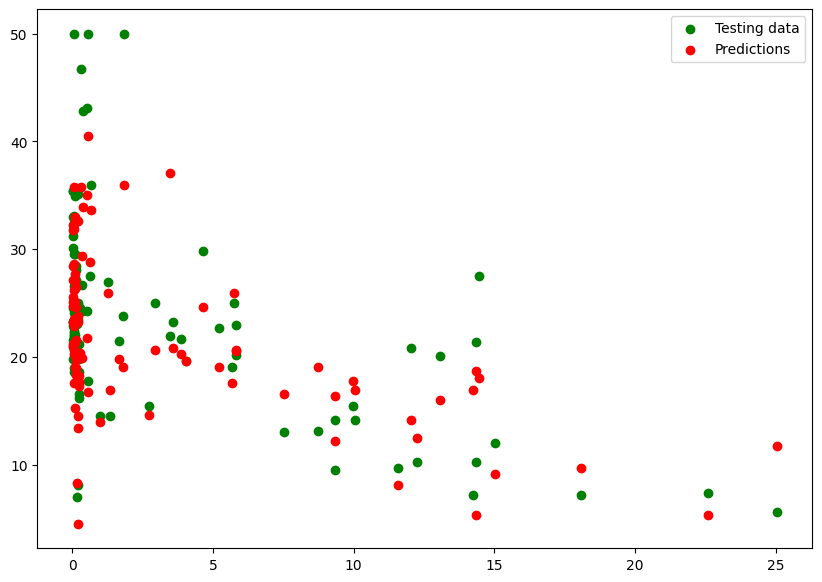

In [ ]:
# Plot predictions
plot_preds(test_data=X_test['CRIM'], test_labels=y_test, predictions=y_pred_2)

Text(0.5, 0, 'epochs')

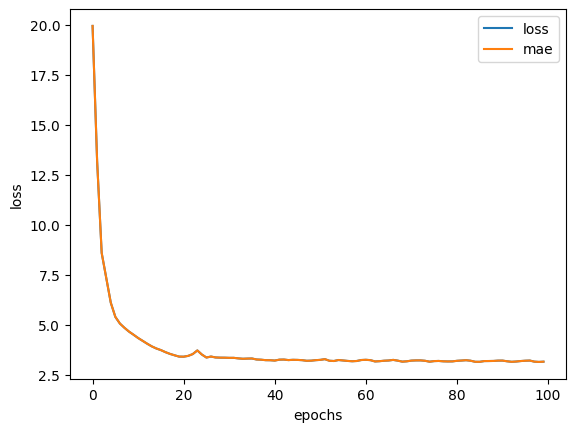

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

#### Try changing the Adam learning rate.

Default learning rate is `learning_rate=0.001`.

This did not improve the original model but performed better than the model with an extra layer.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
boston_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
boston_model_3.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                     metrics=['mae'])

# 3. Fit the model
history_3 = boston_model_3.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 17.5883 - mae: 17.5883
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2914 - mae: 8.2914
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.4587 - mae: 5.4587 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0185 - mae: 5.0185
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4.6986 - mae: 4.6986 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3983 - mae: 4.3983 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.0895 - mae: 4.0895 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.7322 - mae: 3.7322 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.4709 - mae: 3.4709 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3638 - mae: 3.3638 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.3450 - mae: 3.3450 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.3282 - mae: 3.3282 
Epoch 13/100
13/13 ━━━━━━━

In [ ]:
# Make some predictions
y_pred_3 = boston_model_3.predict(X_test_normal)
y_pred_3

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[10.105569 ],
       [18.912737 ],
       [20.766338 ],
       [27.10354  ],
       [23.720243 ],
       [20.081257 ],
       [28.642292 ],
       [23.649715 ],
       [19.697206 ],
       [20.598036 ],
       [18.065739 ],
       [17.303328 ],
       [16.636328 ],
       [35.303535 ],
       [14.603152 ],
       [20.361599 ],
       [24.883411 ],
       [21.097288 ],
       [17.655087 ],
       [19.40227  ],
       [ 9.425323 ],
       [13.261946 ],
       [20.502821 ],
       [14.193462 ],
       [22.276163 ],
       [20.550922 ],
       [29.230434 ],
       [26.991438 ],
       [12.739417 ],
       [20.528334 ],
       [21.66086  ],
       [17.337322 ],
       [32.465748 ],
       [23.653624 ],
       [15.93898  ],
       [ 5.195586 ],
       [15.134723 ],
       [20.127502 ],
       [15.111326 ],
       [27.950228 ],
       [25.13146  ],
       [26.607618 ],
       [16.265615 ],
       [35.059544 ],
       [27.539715 ],
       [23.300116 ],
       [28.857885 ],
       [17.89

In [ ]:
# Evaluate the model
boston_model_3.evaluate(X_test_normal, y_test)

# boston_model: [3.0738275051116943, 3.0738275051116943]
# boston_model_2: [3.161533832550049, 3.161533832550049]

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 2.9290 - mae: 2.9290 


[3.1031806468963623, 3.1031806468963623]

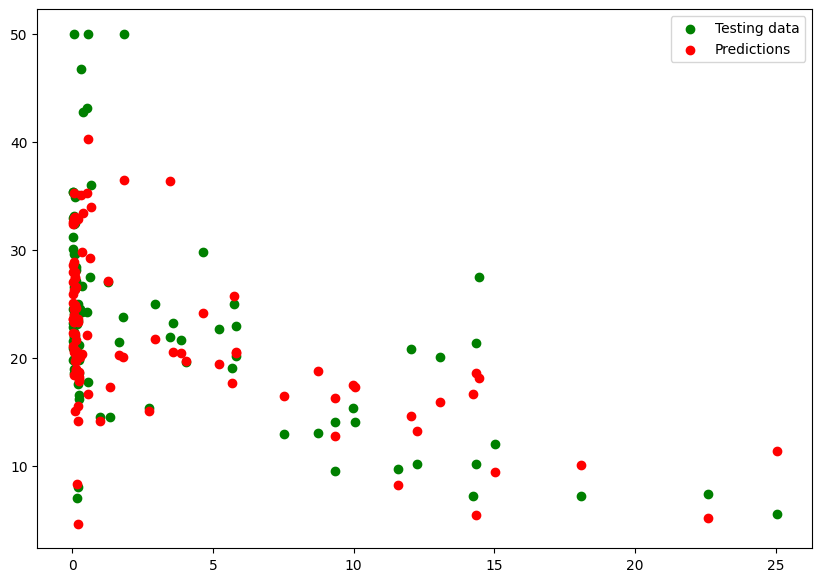

In [ ]:
# Plot predictions
plot_preds(test_data=X_test['CRIM'], test_labels=y_test, predictions=y_pred_3)

Text(0.5, 0, 'epochs')

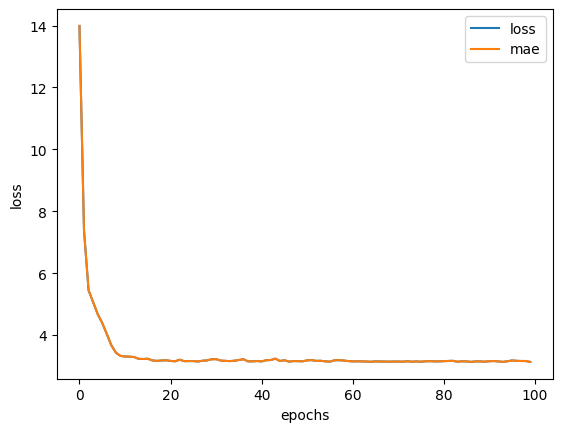

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history_3.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

### 📖 Extra curriculum

* [MIT introduction deep learning lecture 1](https://youtu.be/njKP3FqW3Sk) - gives a great overview of what's happening behind all of the code we're running.
* Reading: 1-hour of [Chapter 1 of Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap1.html) by Michael Nielson - a great in-depth and hands-on example of the intuition behind neural networks.

To practice your regression modelling with TensorFlow, I'd also encourage you to look through [Lion Bridge's collection of datasets](https://lionbridge.ai/datasets/) or [Kaggle's datasets](https://www.kaggle.com/data), find a regression dataset which sparks your interest and try to model.